In [ ]:
#pip install opencv-python

In [ ]:
#pip install torch

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#%cd /content/gdrive/'My Drive'/'Colab'
#!unzip 'Yolo.zip'

/content/gdrive/My Drive/Colab
Archive:  Yolo.zip
replace Yolo/cfg/yolov3.cfg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
path_Yolo = "/content/gdrive/My Drive/Colab/"

In [4]:
%run "/content/gdrive/My Drive/Colab/Yolo/utils.py"

In [5]:
%run "/content/gdrive/My Drive/Colab/Yolo/darknet.py"

In [6]:
# Set the location and name of the cfg file
cfg_file = path_Yolo + 'Yolo/cfg/yolov3.cfg'
# Set the location and name of the pre-trained weights file
weight_file = path_Yolo + 'Yolo/weights/yolov3.weights'
# Set the location and name of the COCO object classes file
namesfile = path_Yolo + 'Yolo/data/coco.names'
# Load the network architecture
m = Darknet(cfg_file)
# Load the pre-trained weights
m.load_weights(weight_file)
# Load the COCO object classes
class_names = load_class_names(namesfile)

In [7]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

In [8]:
print(m.width, m.height)

416 416


In [9]:
# Load the image
img = cv2.imread(path_Yolo + 'Yolo/images/dog.jpg')
# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

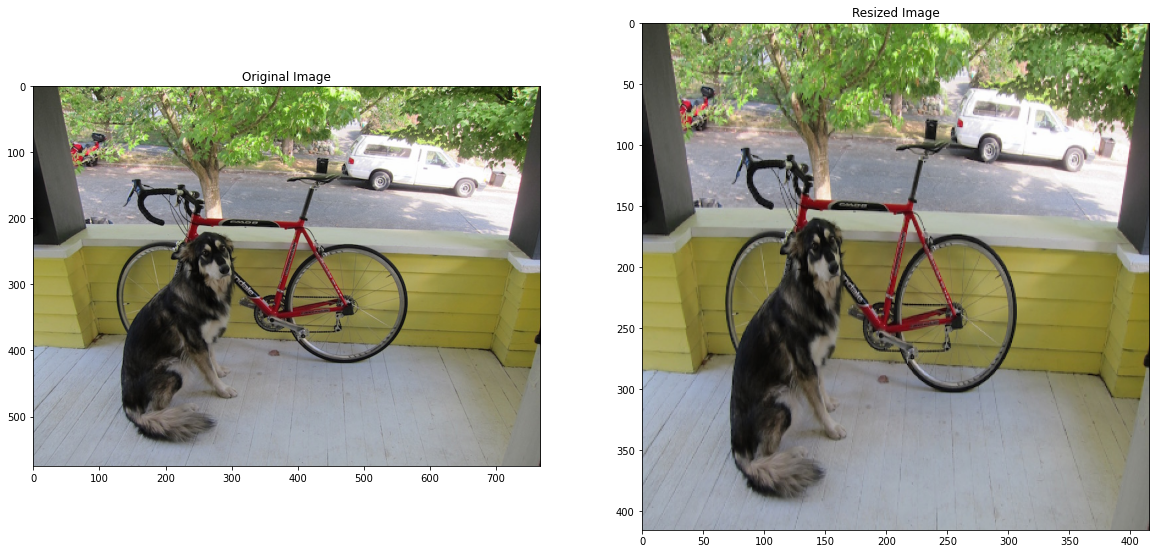

In [10]:
# Display the images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [11]:
# Set the NMS threshold
nms_thresh = 0.6
# Set the IOU threshold
iou_thresh = 0.4

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)



It took 1.583 seconds to detect the objects in the image.

Number of Objects Detected: 3 



Objects Found and Confidence Level:

1. dog: 0.999997
2. truck: 0.992364
3. bicycle: 0.999998


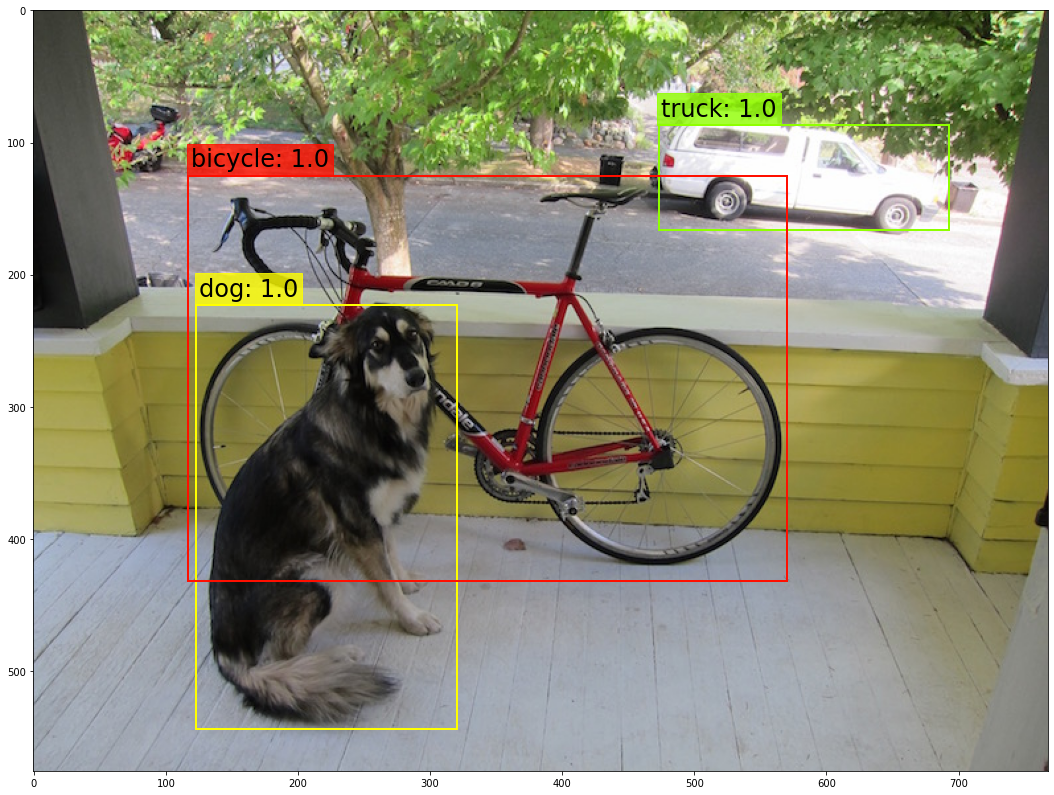

In [12]:
# Print the objects found and the confidence level
print_objects(boxes, class_names)
#Plot the image with bounding boxes and corresponding object class labels
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [13]:
img = original_image.copy()
width = img.shape[1]
height = img.shape[0]
    
for i in range(len(boxes)):
    box = boxes[i]
    # Get the (x,y) pixel coordinates of the lower-left and lower-right corners
    # of the bounding box relative to the size of the image. 
    x1 = int(np.around((box[0] - box[2]/2.0) * width))
    y1 = int(np.around((box[1] - box[3]/2.0) * height))
    x2 = int(np.around((box[0] + box[2]/2.0) * width))
    y2 = int(np.around((box[1] + box[3]/2.0) * height))
    
    if len(box) >= 7 and class_names:
        cls_conf = box[5]
        cls_id = box[6]
        print('%i. %s: %f' % (i + 1, class_names[cls_id], cls_conf))
        print("left top right bottom :", x1, y1, x2, y2)

1. dog: 0.999997
left top right bottom : 123 223 320 544
2. truck: 0.992364
left top right bottom : 473 87 693 166
3. bicycle: 0.999998
left top right bottom : 117 125 570 432




It took 1.523 seconds to detect the objects in the image.

Number of Objects Detected: 42 

1. car: 0.999979
left top right bottom : 220 310 368 417
2. car: 0.999898
left top right bottom : 37 322 209 435
3. car: 0.994540
left top right bottom : 414 276 526 378
4. car: 0.999352
left top right bottom : 137 249 242 347
5. car: 0.753387
left top right bottom : 622 247 746 375
6. car: 0.998294
left top right bottom : -2 260 119 364
7. person: 0.999961
left top right bottom : 815 331 872 427
8. car: 0.999993
left top right bottom : 165 410 341 434
9. car: 0.999970
left top right bottom : 665 398 851 435
10. person: 0.999979
left top right bottom : 582 385 648 435
11. car: 0.997336
left top right bottom : 879 192 956 261
12. car: 0.999162
left top right bottom : 196 188 288 259
13. car: 0.988598
left top right bottom : 298 210 392 282
14. car: 0.999284
left top right bottom : 322 176 411 238
15. car: 0.538345
left top right bottom : 100 172 198 244
16. car: 0.998812
left top right bottom :

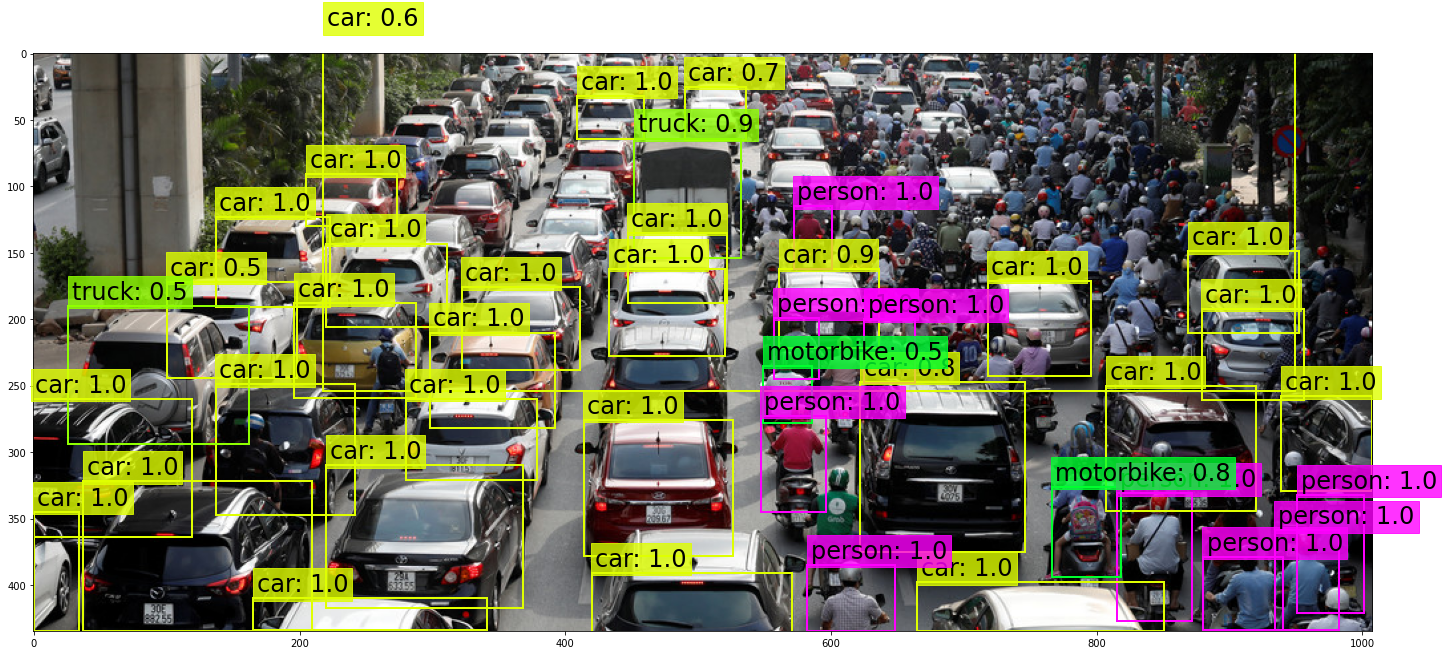

<Figure size 1728x1008 with 0 Axes>

In [18]:
# Load the image
filename = 'Traffic'
ext = '.jpg'
img = cv2.imread(path_Yolo + 'Yolo/images/' + filename + ext)
# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the NMS threshold
nms_thresh = 0.6
# Set the IOU threshold
iou_thresh = 0.4
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)


img = original_image.copy()
width = img.shape[1]
height = img.shape[0]
    
for i in range(len(boxes)):
    box = boxes[i]
    # Get the (x,y) pixel coordinates of the lower-left and lower-right corners
    # of the bounding box relative to the size of the image. 
    x1 = int(np.around((box[0] - box[2]/2.0) * width))
    y1 = int(np.around((box[1] - box[3]/2.0) * height))
    x2 = int(np.around((box[0] + box[2]/2.0) * width))
    y2 = int(np.around((box[1] + box[3]/2.0) * height))
    
    if len(box) >= 7 and class_names:
        cls_conf = box[5]
        cls_id = box[6]
        print('%i. %s: %f' % (i + 1, class_names[cls_id], cls_conf))
        print("left top right bottom :", x1, y1, x2, y2)

# Print the objects found and the confidence level
print_objects(boxes, class_names)
#Plot the image with bounding boxes and corresponding object class labels
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]
plot_boxes(original_image, boxes, class_names, plot_labels = True)
plt.savefig(path_Yolo + 'Yolo/images/' + filename + "-Result" + ext)